## Interactive Stacks

This notebook shows some examples as to how to work with stacks interactively.

Requires ipywidgets to be installed.

First load a test image....

In [5]:
from skimage.io import imread
import os
import matplotlib.pyplot as plt
from tnia.plotting.interactive_projections import show_xyz_slice_interactive
from ipywidgets import interact, IntSlider 

dir_name=r'/home/bnorthan/Images/'
dir_name= r'D:\images'

im_name = os.path.join(dir_name, r'tnia-python-images/deconvolution/microtubules/input.tif')
im=imread(im_name)

## Example 1 

Here we use the interactive projections utility from ```tnia.plotting``` to show a xy/zy/xz projection with cross hairs.  Right now this utility is a bit slow as it uses plt.imshow() under the hood.  When I get some time I'll probably try re-writing it to be faster by using ```set_data```.

In [6]:

from tnia.plotting.interactive_projections import show_xyz_slice_interactive
show_xyz_slice_interactive(im, sxy=1, sz=1,figsize=(10,7))


interactive(children=(IntSlider(value=256, description='x', max=511), IntSlider(value=128, description='y', ma…

## Example 2 

Here we use a second interactive slice viewer tool from tnia.plotting.  The second implementation calls ```set_data``` from the axis and is faster but needs to run with ```%matplotlib widget```.   (And as of Dec 2024 it probably needs a bit of cleanup and optimization)

interactive(children=(IntSlider(value=64, description='z', layout=Layout(width='800px'), max=127), Output()), …

interactive(children=(IntSlider(value=128, description='y', layout=Layout(width='800px'), max=255), Output()),…

interactive(children=(IntSlider(value=256, description='x', layout=Layout(width='800px'), max=511), Output()),…

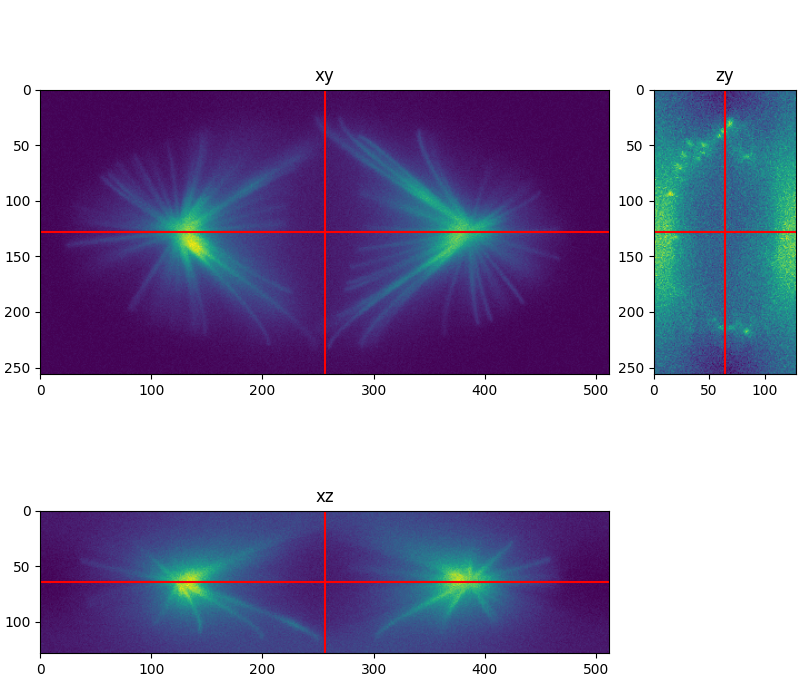

In [7]:
%matplotlib widget

from tnia.plotting.interactive_projections import show_xyz_slice_interactive_2

fig = show_xyz_slice_interactive_2(im, sxy=1, sz=1,figsize=(8,7), colormap=None, vmax=None)

## Example 3 

Use IntSlider to change frame, and plt.imshow to show image.  This can be used as a building block for your own interactive widgets. 

This method is a bit slow because each time the slider is moved the entire frame is redrawn using ```plt.imshow``` however the code is short and simple.  

In [8]:
%matplotlib inline

# Define a function to display a 2D frame of the array with a given intensity range
def display_frame(frame):
    plt.imshow(im[frame])
    plt.show()

# Use the interact function to create slider widgets that control the frame number and intensity range
frame_slider = IntSlider(min=0, max=im.shape[0]-1, step=1, value=0)

# Use the interact function to create a slider widget that controls the frame number
interact(display_frame, frame=frame_slider)

interactive(children=(IntSlider(value=0, description='frame', max=127), Output()), _dom_classes=('widget-inter…

<function __main__.display_frame(frame)>

## Example 4 

In example 3 we called ```plt.imshow``` each time the slider was moved.   In this example we keep track of the ```AxesImage``` object returned from calling ```ax.imshow``` and use it to set new data via ```set_data```.  This is much faster but the code is a bit more complicated and we have to put the notebook into ```%matplotlib widget``` mode to get it to work. 

interactive(children=(IntSlider(value=64, description='z', max=127), Output()), _dom_classes=('widget-interact…

interactive(children=(IntSlider(value=128, description='x', max=255), Output()), _dom_classes=('widget-interac…

<function __main__.display_x(x)>

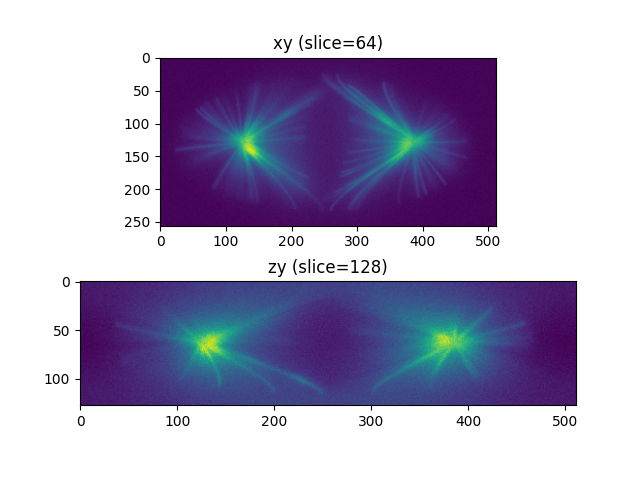

In [10]:
# Ensure an interactive backend (only needed if running in Jupyter)
%matplotlib widget

fig=plt.figure()
xy = im[im.shape[0]//2,:,:]
zy = im[:,im.shape[1]//2,:]

ax0=fig.add_subplot(211)
ax1=fig.add_subplot(212)

img0 = ax0.imshow(xy)
ax0.set_title('xy')
img1 = ax1.imshow(zy)
ax1.set_title('zy')

# Define a function to display a 2D frame of the array with a given intensity range
def display_z(z):
    xy = im[z,:,:]
    
    img0.set_data(xy)
    ax0.set_title(f'xy (slice={z})')
    fig.canvas.draw_idle()
    #ax0.imshow(xy)

    #fig.canvas.draw()
    print('slice is '+str(z))

def display_x(x):
    zy = im[:,x,:]
    img1.set_data(zy)
    ax1.set_title(f'zy (slice={x})')
    fig.canvas.draw_idle()
    #ax1.imshow(zy)
    print('slice is '+str(x))

z_slider = IntSlider(min=0, max=im.shape[0]-1, step=1, value=im.shape[0]//2)
x_slider = IntSlider(min=0, max=im.shape[1]-1, step=1, value=im.shape[1]//2)

interact(display_z, z=z_slider)
interact(display_x, x=x_slider)



## Example 5 

Here we show how to control both frame number and intensity range. 

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatRangeSlider

# Define a function to display a 2D frame of the array with a given intensity range
def display_frame(frame, intensity_range):
    plt.imshow(im[frame], cmap='gray', vmin=intensity_range[0], vmax=intensity_range[1])
    plt.show()

# Use the interact function to create slider widgets that control the frame number and intensity range
frame_slider = IntSlider(min=0, max=im.shape[0]-1, step=1, value=0)
range_slider = FloatRangeSlider(min=np.min(im), max=np.max(im), step=0.1,
                                value=[np.min(im), np.max(im)], description='Intensity Range')


# Use the interact function to create a slider widget that controls the frame number
interact(display_frame, frame=frame_slider, intensity_range=range_slider)

interactive(children=(IntSlider(value=0, description='frame', max=127), FloatRangeSlider(value=(0.0, 1009.0), …

<function __main__.display_frame(frame, intensity_range)>